In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

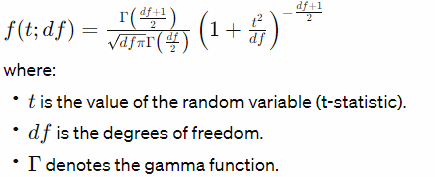

In [4]:
def t_distribution_pdf(t_values, df):
    """
    Calculate the probability density function (PDF) of the t-distribution for a given set of t values.
    
    Parameters:
    - t_values: Array-like object containing the values of the random variable (t-statistic).
    - df: Degrees of freedom.
    
    Returns:
    - Array of PDF values corresponding to the input t values.
    """
    numerator   = np.math.gamma((df + 1) / 2)
    denominator = np.sqrt(df * np.math.pi) * np.math.gamma(df / 2)
    coefficient = numerator / denominator
    
    pdf = coefficient * (1 + (t_values ** 2 / df)) ** (- (df + 1) / 2)
    return pdf

In [5]:
# Range of t values
# The t-distribution approaches the standard normal distribution 
# as the degrees of freedom increase, and most of the probability density is 
# concentrated within approximately three standard deviations from the mean. 
# By choosing a range of t-values from -4 to 4, we ensure that we capture the 
# vast majority of the distribution's probability density while still allowing for 
# the possibility of extreme values.

t_values = np.linspace(-4, 4, 1000)

In [6]:
# Degrees of freedom
df = 8

In [7]:
# Calculate PDF values for the t-distribution
pdf_values = t_distribution_pdf(t_values, df)

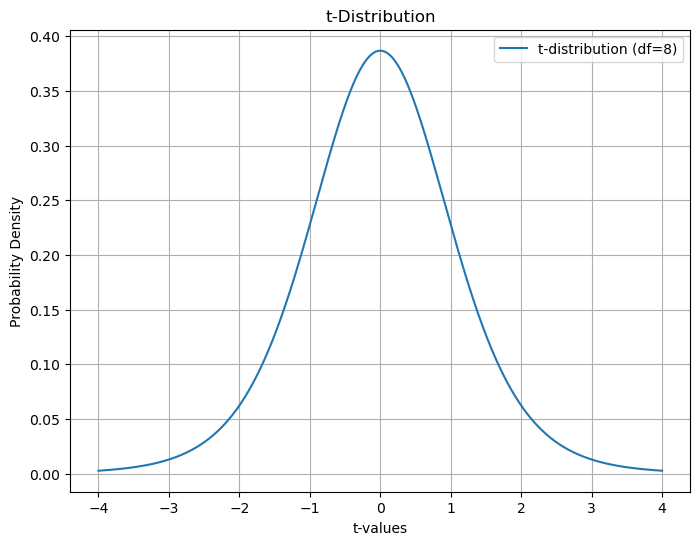

In [8]:
# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(t_values, pdf_values, label=f't-distribution (df={df})')
plt.title('t-Distribution')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### show the PDF and CDF of t-dist

In [9]:
import scipy.stats as stats

In [10]:
# Define range of t-values and degrees of freedom
t_values = np.linspace(-4, 4, 1000)
df = 8

In [11]:
# Calculate PDF and CDF values for the t-distribution
pdf_values = stats.t.pdf(t_values, df)
cdf_values = stats.t.cdf(t_values, df)

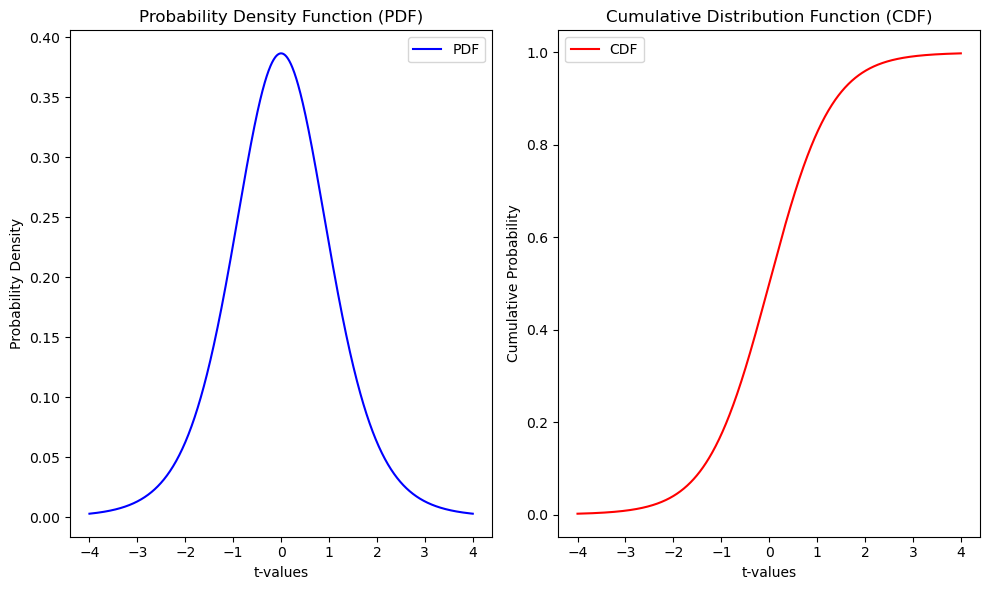

In [12]:
# Plot the t-distribution, PDF, and CDF
plt.figure(figsize=(10, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(t_values, pdf_values, label='PDF', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(t_values, cdf_values, label='CDF', color='red')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('t-values')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

#### show where t-statistic = -0.247 would point at

In [13]:
# Define range of t-values and degrees of freedom
t_values = np.linspace(-4, 4, 1000)
df = 8

In [14]:
# Calculate CDF values for the t-distribution
cdf_values = stats.t.cdf(t_values, df)

In [15]:
# Calculate the CDF value for the t-statistic of -0.247
t_statistic = -0.247
t_statistic_cdf = stats.t.cdf(t_statistic, df)
t_statistic_cdf

0.4055643639555758

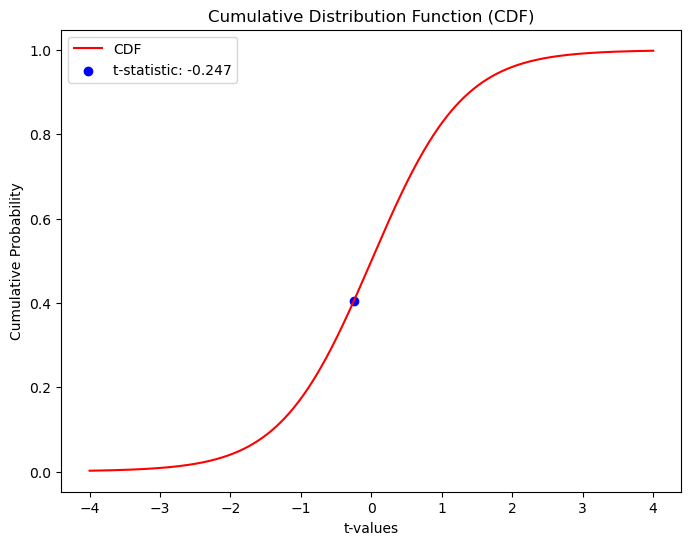

In [16]:
# Plot the t-distribution and CDF
plt.figure(figsize=(8, 6))

# Plot CDF
plt.plot(t_values, cdf_values, label='CDF', color='red')
plt.scatter(t_statistic, t_statistic_cdf, color='blue', label=f't-statistic: {t_statistic}')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('t-values')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.show()

Based on the t-distribution with 8 degrees of freedom, the cumulative probability associated with the t-statistic of -0.247 is approximately 0.4056. This means that there's a probability of approximately 40.56% of observing a t-statistic less than or equal to -0.247 under the given t-distribution.

In [17]:
# Calculate the p-value for a two-tailed test
p_value = 2 * min(t_statistic_cdf, 1 - t_statistic_cdf)
print("p-value:", p_value)

p-value: 0.8111287279111516


In [18]:
# Degrees of freedom
df = 8

# Significance level
alpha = 0.05

# Calculate critical value for a two-tailed test
critical_value = stats.t.ppf(1 - alpha/2, df)
print("Critical value:", critical_value)

Critical value: 2.3060041350333704


#### probability density function (PDF) 
- of the t-distribution for `different degrees of freedom (df)` and a significance level (alpha) of 0.05.

In [22]:
from scipy.stats import t

In [30]:
# Define degrees of freedom and significance level
degrees_of_freedom = [1, 2, 3, 30]
alpha = 0.05

In [31]:
# Generate x values for plotting
x = np.linspace(-5, 5, 1000)

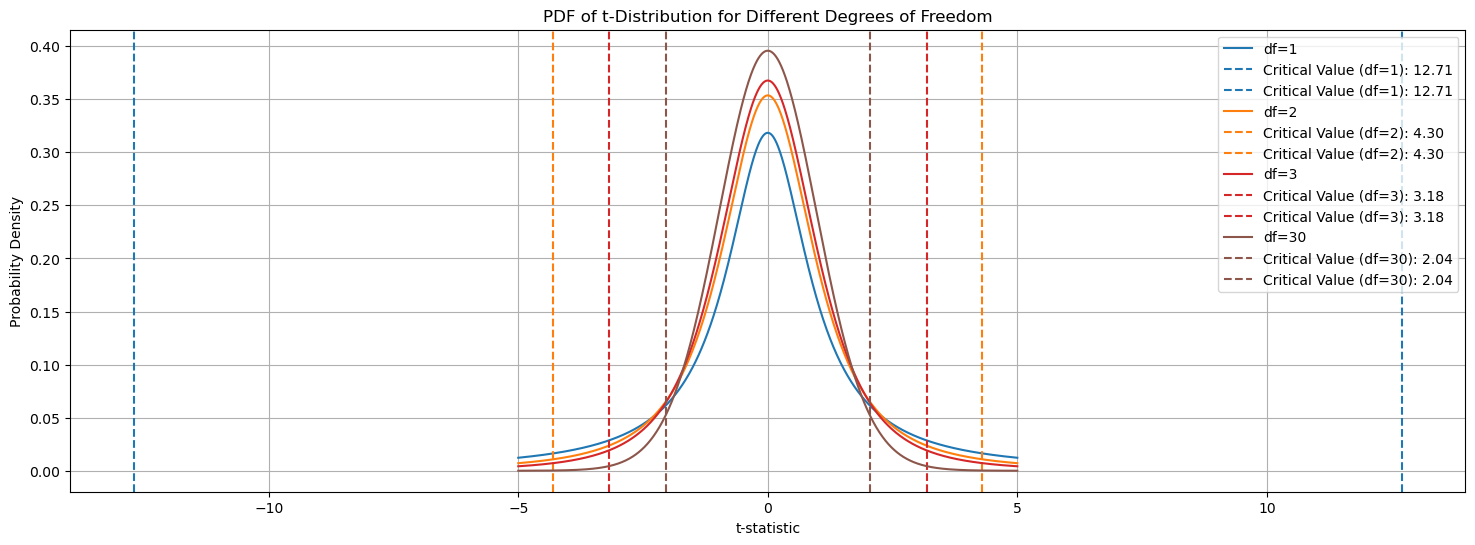

In [39]:
# Plot the PDF of the t-distribution for each df
plt.figure(figsize=(18, 6))
colors = plt.cm.tab10(np.linspace(0, .5, len(degrees_of_freedom)))  # Get a list of colors

for i, df in enumerate(degrees_of_freedom):
    #color = plt.cm.jet(df / max(degrees_of_freedom))  # Choose a color based on df
    pdf = t.pdf(x, df)
    plt.plot(x, pdf, label=f'df={df}', color=colors[i])

    # Add vertical lines for critical values at alpha/2 and -alpha/2
    t_critical = t.ppf(1 - alpha / 2, df)
    plt.axvline(t_critical,  color=colors[i], linestyle='--', label=f'Critical Value (df={df}): {t_critical:.2f}')
    plt.axvline(-t_critical, color=colors[i], linestyle='--', label=f'Critical Value (df={df}): {t_critical:.2f}')

plt.title('PDF of t-Distribution for Different Degrees of Freedom')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()